In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df['Title'] = df['Name'].apply(lambda x: x.split(',')[1].split(' ')[1])

In [5]:
df.groupby(['Title'])['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Title,,,,,,,,
Capt.,1.0,70.000000,NaN,70.00,70.000,70.0,70.00,70.0
Col.,2.0,58.000000,2.828427,56.00,57.000,58.0,59.00,60.0
Don.,1.0,40.000000,NaN,40.00,40.000,40.0,40.00,40.0
Dr.,6.0,42.000000,12.016655,23.00,35.000,46.5,49.75,54.0
Jonkheer.,1.0,38.000000,NaN,38.00,38.000,38.0,38.00,38.0
Lady.,1.0,48.000000,NaN,48.00,48.000,48.0,48.00,48.0
Major.,2.0,48.500000,4.949747,45.00,46.750,48.5,50.25,52.0
Master.,36.0,4.574167,3.619872,0.42,1.000,3.5,8.00,12.0
Miss.,146.0,21.773973,12.990292,0.75,14.125,21.0,30.00,63.0


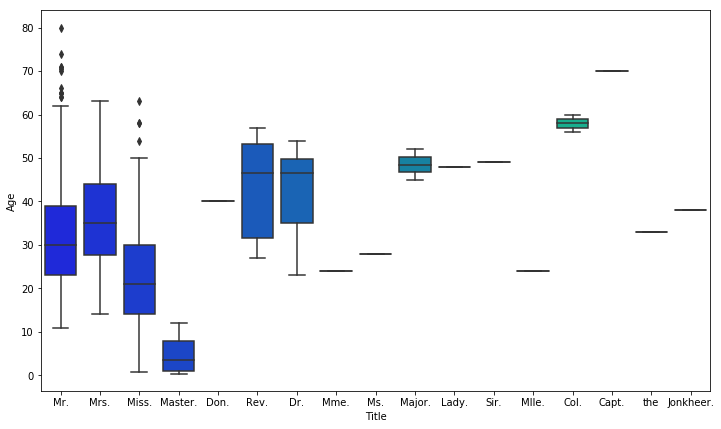

In [6]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Title',y='Age',data=df, palette='winter')

In [7]:
df.groupby(['Pclass'])['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,186.0,38.233441,14.802856,0.92,27.0,37.0,49.0,80.0
2,173.0,29.877630,14.001077,0.67,23.0,29.0,36.0,70.0
3,355.0,25.140620,12.495398,0.42,18.0,24.0,32.0,74.0


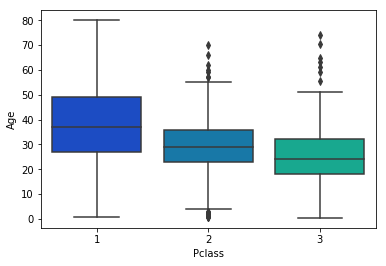

In [8]:
sns.boxplot(x='Pclass',y='Age',data=df, palette='winter')

In [9]:
df.groupby(['SibSp'])['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
SibSp,,,,,,,,
0,471.0,31.397558,13.647767,0.42,22.00,29.0,39.00,80.0
1,183.0,30.089727,14.645033,0.67,20.00,30.0,39.00,70.0
2,25.0,22.620000,14.679230,0.75,16.00,23.0,28.00,53.0
3,12.0,13.916667,11.317391,2.00,3.75,9.5,23.25,33.0
4,18.0,7.055556,4.880601,1.00,3.25,6.5,9.00,17.0
5,5.0,10.200000,5.805170,1.00,9.00,11.0,14.00,16.0
8,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


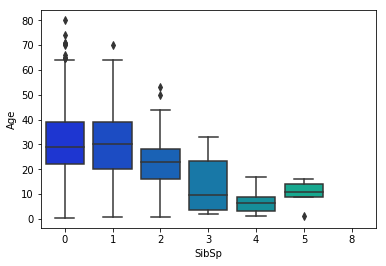

In [10]:
sns.boxplot(x='SibSp',y='Age',data=df, palette='winter')

In [11]:
Title = pd.get_dummies(df['Title'])
Pclass = pd.get_dummies(df['Pclass'],prefix= 'Pclass', prefix_sep='_')
Sex = pd.get_dummies(df['Sex'], drop_first= True)
Embarked = pd.get_dummies(df['Embarked'],prefix= 'Embarked', prefix_sep='_')

In [12]:
df = df.drop(['Pclass', 'Sex', 'Embarked', 'Title', 'Name', 'Ticket','Cabin', 'PassengerId'], axis=1)

In [13]:
df = pd.concat([df, Pclass, Sex, Embarked, Title],axis=1)

In [14]:
train = df[df['Age'].notnull()]

In [15]:
no_age = df[df['Age'].isnull()]
no_age.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,male,Embarked_C,...,Master.,Miss.,Mlle.,Mme.,Mr.,Mrs.,Ms.,Rev.,Sir.,the
5,0,NaN,0,0,8.4583,0,0,1,1,0,...,0,0,0,0,1,0,0,0,0,0
17,1,NaN,0,0,13.0000,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
19,1,NaN,0,0,7.2250,0,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0
26,0,NaN,0,0,7.2250,0,0,1,1,1,...,0,0,0,0,1,0,0,0,0,0
28,1,NaN,0,0,7.8792,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [16]:
train.columns

Index(['Survived', 'Age', 'SibSp', 'Parch', 'Fare', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Capt.',
       'Col.', 'Don.', 'Dr.', 'Jonkheer.', 'Lady.', 'Major.', 'Master.',
       'Miss.', 'Mlle.', 'Mme.', 'Mr.', 'Mrs.', 'Ms.', 'Rev.', 'Sir.', 'the'],
      dtype='object')

In [17]:
x_train = train.drop(['Age', 'Survived'], axis=1)
x_train.head()

,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,male,Embarked_C,Embarked_Q,Embarked_S,...,Master.,Miss.,Mlle.,Mme.,Mr.,Mrs.,Ms.,Rev.,Sir.,the
0,1,0,7.2500,0,0,1,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,1,0,71.2833,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,7.9250,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
3,1,0,53.1000,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,0,0,8.0500,0,0,1,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [18]:
y_train = train['Age']
y_train.head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

In [19]:
x_no_age = no_age.drop(['Age', 'Survived'], axis =1)
x_no_age.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 177 entries, 5 to 888
Data columns (total 27 columns):
SibSp         177 non-null int64
Parch         177 non-null int64
Fare          177 non-null float64
Pclass_1      177 non-null uint8
Pclass_2      177 non-null uint8
Pclass_3      177 non-null uint8
male          177 non-null uint8
Embarked_C    177 non-null uint8
Embarked_Q    177 non-null uint8
Embarked_S    177 non-null uint8
Capt.         177 non-null uint8
Col.          177 non-null uint8
Don.          177 non-null uint8
Dr.           177 non-null uint8
Jonkheer.     177 non-null uint8
Lady.         177 non-null uint8
Major.        177 non-null uint8
Master.       177 non-null uint8
Miss.         177 non-null uint8
Mlle.         177 non-null uint8
Mme.          177 non-null uint8
Mr.           177 non-null uint8
Mrs.          177 non-null uint8
Ms.           177 non-null uint8
Rev.          177 non-null uint8
Sir.          177 non-null uint8
the           177 non-null uint8
dt

In [96]:
from sklearn.linear_model import LassoCV

In [97]:
lm = LassoCV()

In [98]:
lm.fit(x_train, y_train)
lm.score(x_train, y_train)

0.4145868755319112

In [99]:
age_pred = lm.predict(x_no_age)
age_pred

array([33.27875968, 33.53482022, 30.43288986, 27.90969453, 22.863547  ,
       29.92283985, 39.79138227, 22.86542092, 27.90963361, 27.89996522,
       29.92060333, 31.13844052, 22.86542092, 23.62367812, 42.93949706,
       41.0294522 ,  4.62769505, 29.92283985, 29.92060333, 22.86487702,
       29.92060333, 29.92060333, 29.92283985, 29.92459194, 20.58936867,
       29.92060333, 33.28903288, 14.87767589, 29.61510254, 29.93130006,
       29.91171961, -8.75508969, 44.82913705, 43.07837317,  2.42595319,
        1.59805109, 31.48221232, 42.72918857, 33.66163584, 33.28903288,
       22.86542092, 12.02166306, 31.25084677, 29.92283985, 12.77909397,
       19.50424338, 15.3430439 , 20.71482855, 29.93220656, 42.8059915 ,
       33.28903288, 22.86542092, 43.00476521, 22.86542092, 33.72337265,
       43.07728537, 41.0294522 , 43.01201722, 22.86542092, 28.98784815,
       26.48471421, 29.92060333, 29.39964857, 12.02166306, 18.56423619,
       42.00093541, 29.92283985, 30.28885508, 42.94674907, 27.90

In [100]:
no_age['Age'] = age_pred

C:\Users\chris\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [101]:
no_age.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,male,Embarked_C,...,Master.,Miss.,Mlle.,Mme.,Mr.,Mrs.,Ms.,Rev.,Sir.,the
5,0,33.278760,0,0,8.4583,0,0,1,1,0,...,0,0,0,0,1,0,0,0,0,0
17,1,33.534820,0,0,13.0000,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
19,1,30.432890,0,0,7.2250,0,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0
26,0,27.909695,0,0,7.2250,0,0,1,1,1,...,0,0,0,0,1,0,0,0,0,0
28,1,22.863547,0,0,7.8792,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [102]:
no_age.columns


Index(['Survived', 'Age', 'SibSp', 'Parch', 'Fare', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Capt.',
       'Col.', 'Don.', 'Dr.', 'Jonkheer.', 'Lady.', 'Major.', 'Master.',
       'Miss.', 'Mlle.', 'Mme.', 'Mr.', 'Mrs.', 'Ms.', 'Rev.', 'Sir.', 'the'],
      dtype='object')

In [103]:
new_df = pd.concat([train, no_age], axis=0)

In [104]:
new_df

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,male,Embarked_C,...,Master.,Miss.,Mlle.,Mme.,Mr.,Mrs.,Ms.,Rev.,Sir.,the
0,0,22.000000,1,0,7.2500,0,0,1,1,0,...,0,0,0,0,1,0,0,0,0,0
1,1,38.000000,1,0,71.2833,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,1,26.000000,0,0,7.9250,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1,35.000000,1,0,53.1000,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,35.000000,0,0,8.0500,0,0,1,1,0,...,0,0,0,0,1,0,0,0,0,0
6,0,54.000000,0,0,51.8625,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
7,0,2.000000,3,1,21.0750,0,0,1,1,0,...,1,0,0,0,0,0,0,0,0,0
8,1,27.000000,0,2,11.1333,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
9,1,14.000000,1,0,30.0708,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
10,1,4.000000,1,1,16.7000,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [105]:
from sklearn.preprocessing import StandardScaler

In [106]:
scaler = StandardScaler()

In [107]:
scaler.fit(new_df[['Fare', 'Age']]) 

StandardScaler(copy=True, with_mean=True, with_std=True)

In [108]:
scaled_features = scaler.transform(new_df[['Fare', 'Age']])

In [109]:
train_scaled_feat = pd.DataFrame(scaled_features,columns=['Fare', 'Age'], index=new_df.index)

In [110]:
train_scaled_feat = pd.concat([new_df.drop(['Fare', 'Age'], axis = 1), train_scaled_feat], axis = 1)

In [111]:
x_train_survived= train_scaled_feat.drop(['Survived'], axis=1)
x_train_survived.head()

,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,male,Embarked_C,Embarked_Q,Embarked_S,Capt.,...,Mlle.,Mme.,Mr.,Mrs.,Ms.,Rev.,Sir.,the,Fare,Age
0,1,0,0,0,1,1,0,0,1,0,...,0,0,1,0,0,0,0,0,-0.502445,-0.557375
1,1,0,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0.786845,0.617465
2,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,-0.488854,-0.263665
3,1,0,1,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0.420730,0.397183
4,0,0,0,0,1,1,0,0,1,0,...,0,0,1,0,0,0,0,0,-0.486337,0.397183


In [112]:
y_train_survived= train_scaled_feat['Survived']

In [113]:
from sklearn.linear_model import LogisticRegressionCV

In [134]:
logmodel = LogisticRegressionCV(cv=3,
                                penalty='l1',
                                solver = 'liblinear',
                                scoring='accuracy',
                                n_jobs=-1,
                                class_weight='balanced').fit(x_train_survived, y_train_survived)

In [135]:
logmodel.score(x_train_survived, y_train_survived)

0.8249158249158249

In [136]:
df_test = pd.read_csv('test.csv')
df_test.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [137]:
submission = df_test[['PassengerId']]

In [138]:
df_test['Title'] = df_test['Name'].apply(lambda x: x.split(',')[1].split(' ')[1])
Title = pd.get_dummies(df_test['Title'])
Pclass = pd.get_dummies(df_test['Pclass'],prefix= 'Pclass', prefix_sep='_')
Sex = pd.get_dummies(df_test['Sex'], drop_first= True)
Embarked = pd.get_dummies(df_test['Embarked'],prefix= 'Embarked', prefix_sep='_')

In [139]:
df_test = df_test.drop(['Pclass', 'Sex', 'Embarked', 'Title', 'Name', 'Cabin'], axis=1)

In [140]:
df_test = pd.concat([df_test, Pclass, Sex, Embarked, Title],axis=1)

In [141]:
df_test = df_test.reindex(df.columns, axis=1, fill_value=0).drop('Survived', axis=1)
df_test.head()

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,male,Embarked_C,Embarked_Q,...,Master.,Miss.,Mlle.,Mme.,Mr.,Mrs.,Ms.,Rev.,Sir.,the
0,34.5,0,0,7.8292,0,0,1,1,0,1,...,0,0,0,0,1,0,0,0,0,0
1,47.0,1,0,7.0000,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,62.0,0,0,9.6875,0,1,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0
3,27.0,0,0,8.6625,0,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,22.0,1,1,12.2875,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [142]:
df_test.isnull().sum()

Age           86
SibSp          0
Parch          0
Fare           1
Pclass_1       0
Pclass_2       0
Pclass_3       0
male           0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
Capt.          0
Col.           0
Don.           0
Dr.            0
Jonkheer.      0
Lady.          0
Major.         0
Master.        0
Miss.          0
Mlle.          0
Mme.           0
Mr.            0
Mrs.           0
Ms.            0
Rev.           0
Sir.           0
the            0
dtype: int64

In [143]:
df_test['Fare'][df_test['Fare'].isnull()] = df['Fare'].mean()

C:\Users\chris\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [144]:
df_test['Age'][df_test['Age'].isnull()] = lm.predict(
    df_test[df_test['Age'].isnull()].drop('Age', axis=1)
)

C:\Users\chris\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [145]:
scaled_test_features = scaler.transform(df_test[['Fare', 'Age']]) 

In [146]:
test_scaled_features= pd.DataFrame(scaled_test_features,columns=['Fare', 'Age'],
                                   index=df_test.index)

In [147]:
df_test_scaled = pd.concat([df_test.drop(['Fare','Age'], axis = 1),
                            test_scaled_features], axis = 1)

In [148]:
df_test_scaled.columns

Index(['SibSp', 'Parch', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Capt.', 'Col.', 'Don.',
       'Dr.', 'Jonkheer.', 'Lady.', 'Major.', 'Master.', 'Miss.', 'Mlle.',
       'Mme.', 'Mr.', 'Mrs.', 'Ms.', 'Rev.', 'Sir.', 'the', 'Fare', 'Age'],
      dtype='object')

In [149]:
submission['Survived'] = logmodel.predict(df_test_scaled)

In [150]:
submission.to_csv('submission.csv', index = False)